# CSE1904 Capstone Project 

### Author: ASHWANI PRASAD
### Register No.: 19BCE1873
### Guide: KARMEL A

## Project Title: Detection of DoS Attacks in Wireless Sensor Networks using Evolutionary Algorithms and Machine Learning

In [3]:
# Importing Python libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
from sklearn.model_selection import cross_val_score
from time import time

#### MODULE 1: Data Pre-processing 

In [4]:
# Loading the dataset and viewing it
wsn_ds = pd.read_csv('WSN-DS.csv')
wsn_ds

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal


In [5]:
# Basic information of the dataset
wsn_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               374661 non-null  int64  
 1   Time             374661 non-null  int64  
 2   Is_CH            374661 non-null  int64  
 3   who CH           374661 non-null  int64  
 4   Dist_To_CH       374661 non-null  float64
 5   ADV_S            374661 non-null  int64  
 6   ADV_R            374661 non-null  int64  
 7   JOIN_S           374661 non-null  int64  
 8   JOIN_R           374661 non-null  int64  
 9   SCH_S            374661 non-null  int64  
 10  SCH_R            374661 non-null  int64  
 11  Rank             374661 non-null  int64  
 12  DATA_S           374661 non-null  int64  
 13  DATA_R           374661 non-null  int64  
 14  Data_Sent_To_BS  374661 non-null  int64  
 15  dist_CH_To_BS    374661 non-null  float64
 16  send_code        374661 non-null  int6

In [6]:
# describe() function gives the basic numerical infomation about the data for each numeric feature..
wsn_ds.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [7]:
# Data points count value for each class labels..
wsn_ds['Attack type'].value_counts()

Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: Attack type, dtype: int64

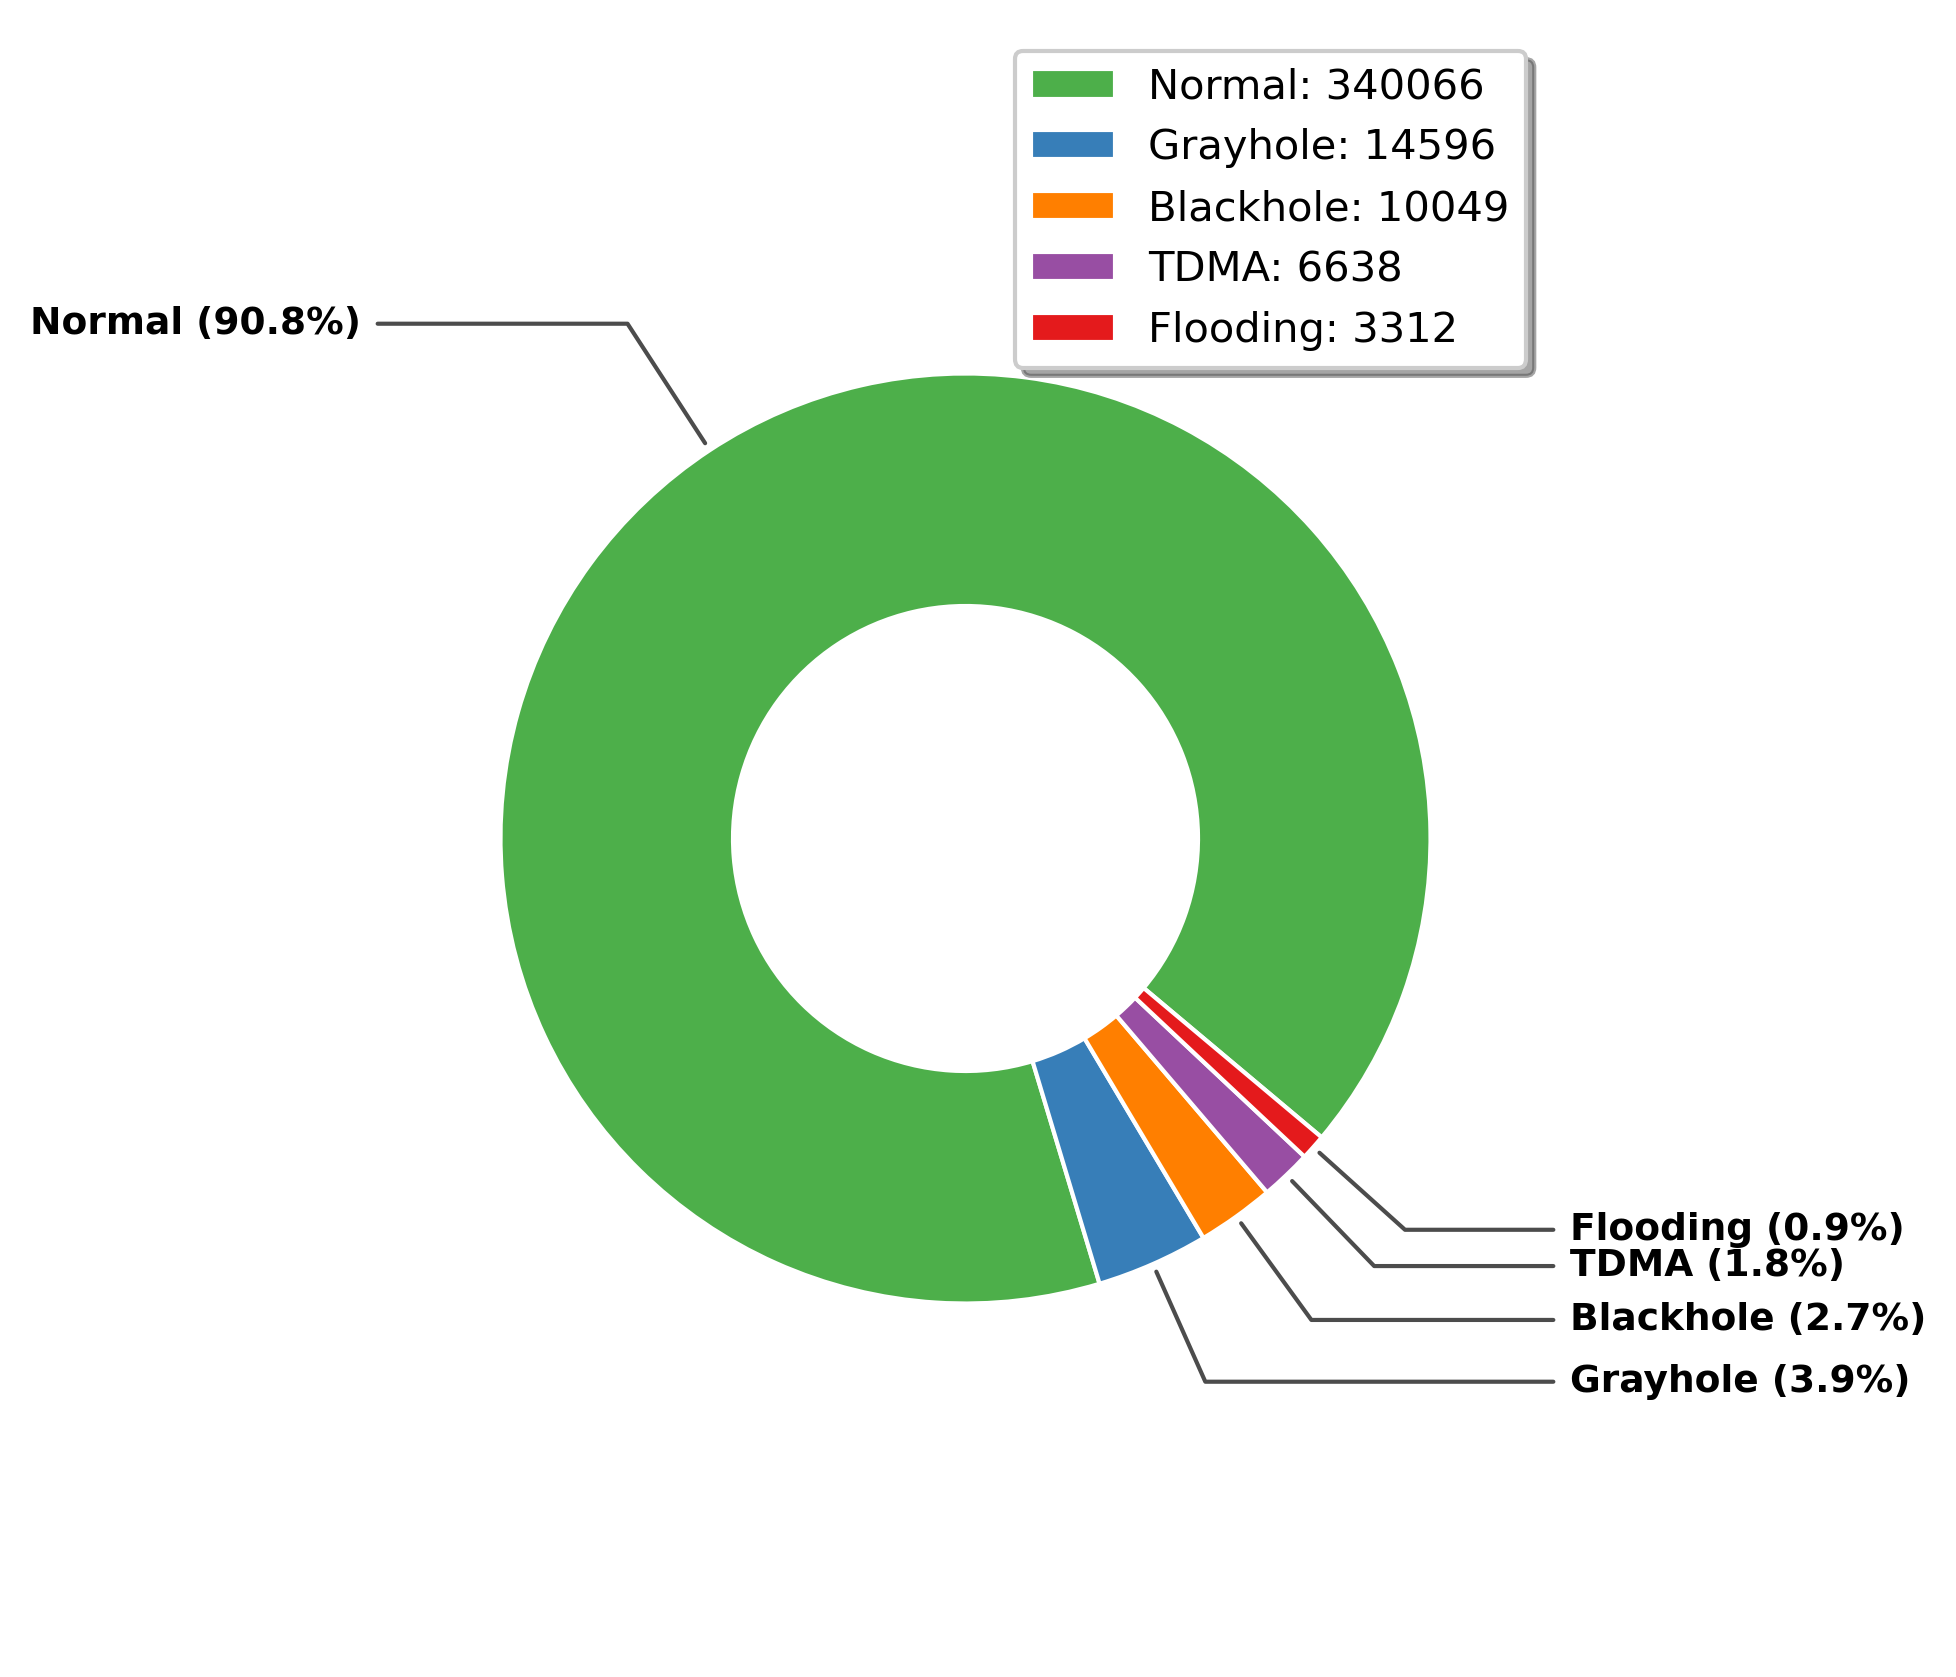

In [8]:
# Visualizing the WSN-DS Attack type distrubution through a donut chart

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
# Define data and labels
data = [340066, 14596, 10049, 6638, 3312]
labels = ['Normal', 'Grayhole', 'Blackhole', 'TDMA', 'Flooding']

# Calculate percentages
total = sum(data)
percentages = [(d / total) * 100 for d in data]

# Set up the figure
fig, ax = plt.subplots(figsize=(5, 7))
ax.axis('equal')

# Define the colors
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#984ea3', '#e41a1c']

# Define the wedge properties
wedgeprops = {'width': 0.5, 'edgecolor': 'w'}

# Create the pie chart
wedges, _ = ax.pie(data, wedgeprops=wedgeprops, startangle=-40, colors=colors)

# Set up the annotation parameters
annotation_params = {'arrowprops': {'arrowstyle': '-', 'lw': 1, 'alpha': 0.7, 'color': 'black'},
                     'fontsize': 9, 'fontweight': 'bold', 'color': 'k'}

# Add the labels with annotations
for i, (wedge, label, percentage) in enumerate(zip(wedges, labels, percentages)):
    angle = (wedge.theta2 - wedge.theta1) / 2. + wedge.theta1
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    horizontalalignment = {-1: 'right', 1: 'left'}[int(np.sign(x))]
    connectionstyle = f'angle,angleA=0,angleB={angle:.0f}'
    annotation_params['arrowprops'].update({'connectionstyle': connectionstyle})
    ax.annotate(f'{label} ({percentage:.1f}%)', xy=(x, y), xytext=(1.3*np.sign(x), 1.3*y), 
                horizontalalignment=horizontalalignment, **annotation_params)
    
# Add a legend
legend_labels = [f"{label}: {data_value}" for label, data_value in zip(labels, data)]
ax.legend(wedges, legend_labels, loc='best', shadow=True, fancybox=True)

# Show the plot
plt.show()


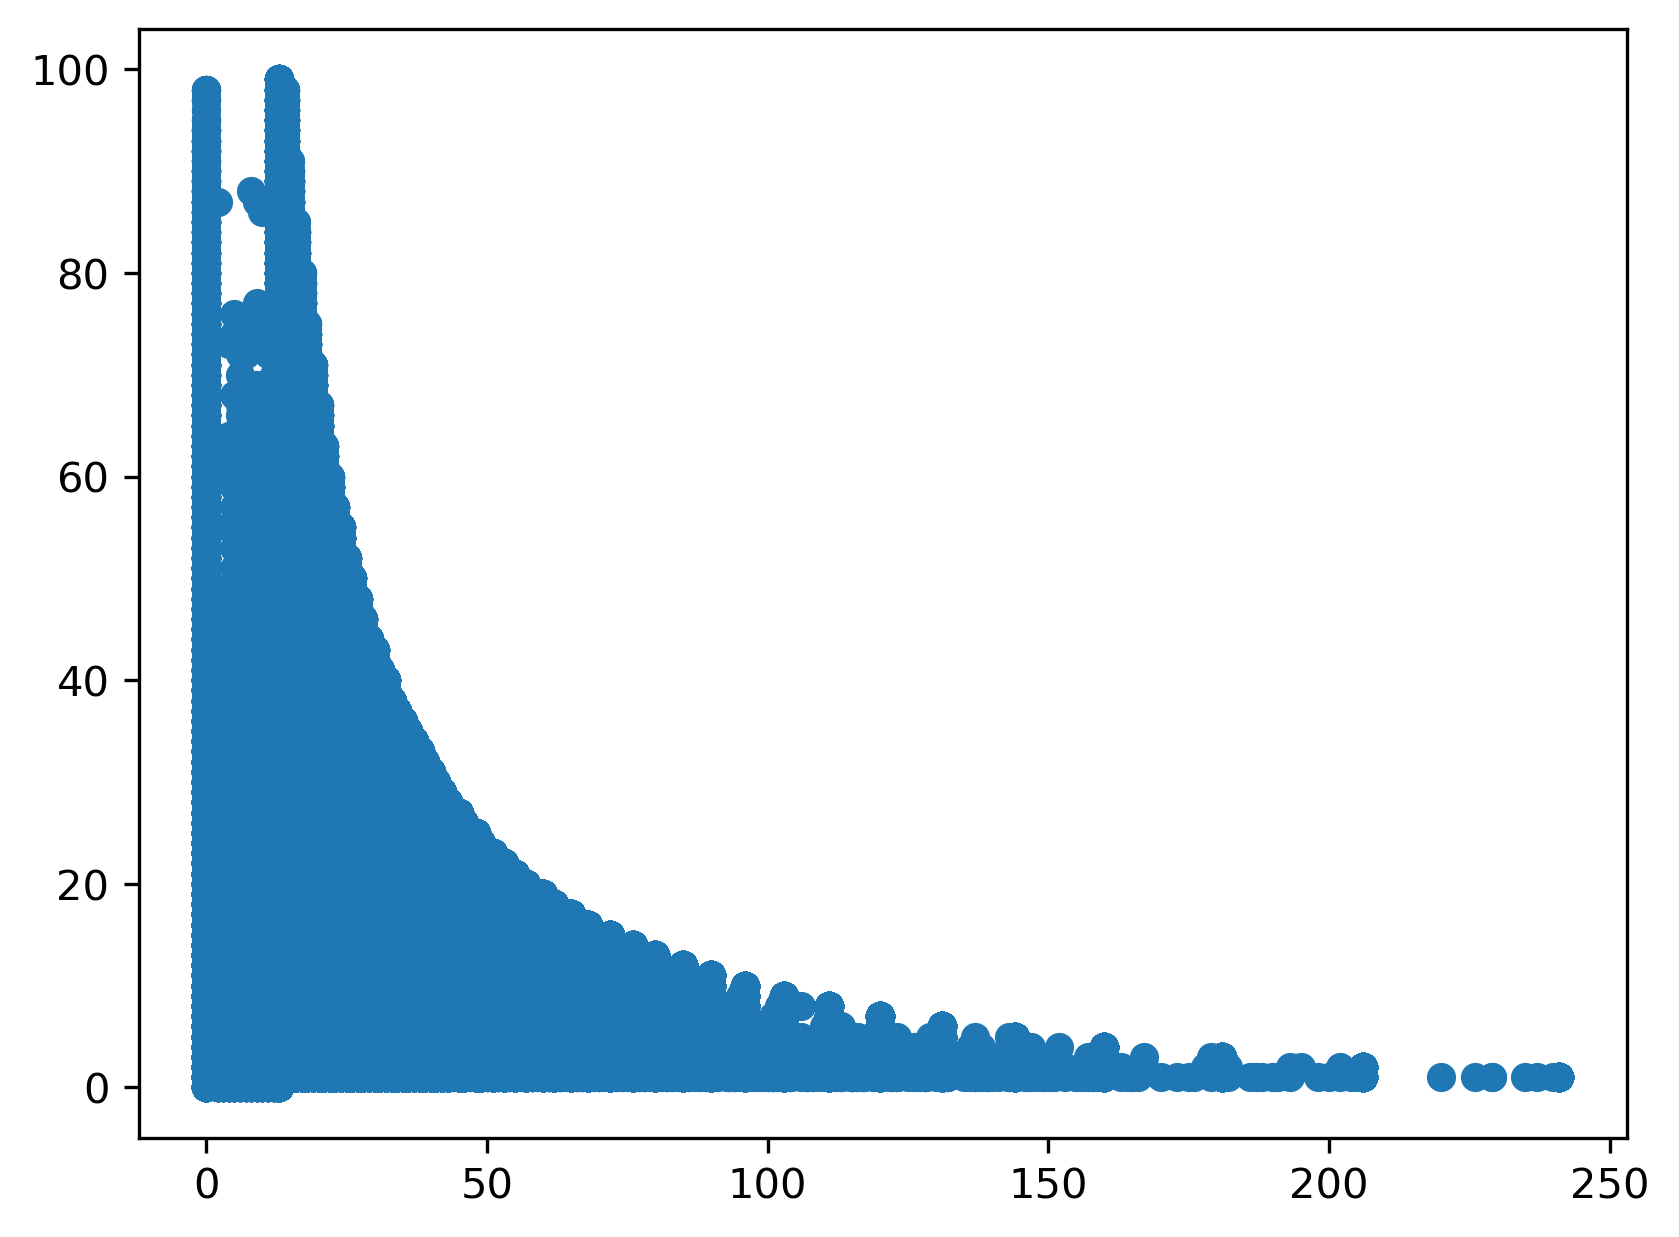

In [9]:
#Visualizing WSN dataset 

#Visualizing the dataset features to find pattern to solve our task
plt.scatter(wsn_ds['DATA_S'], wsn_ds['Rank'])
plt.show()

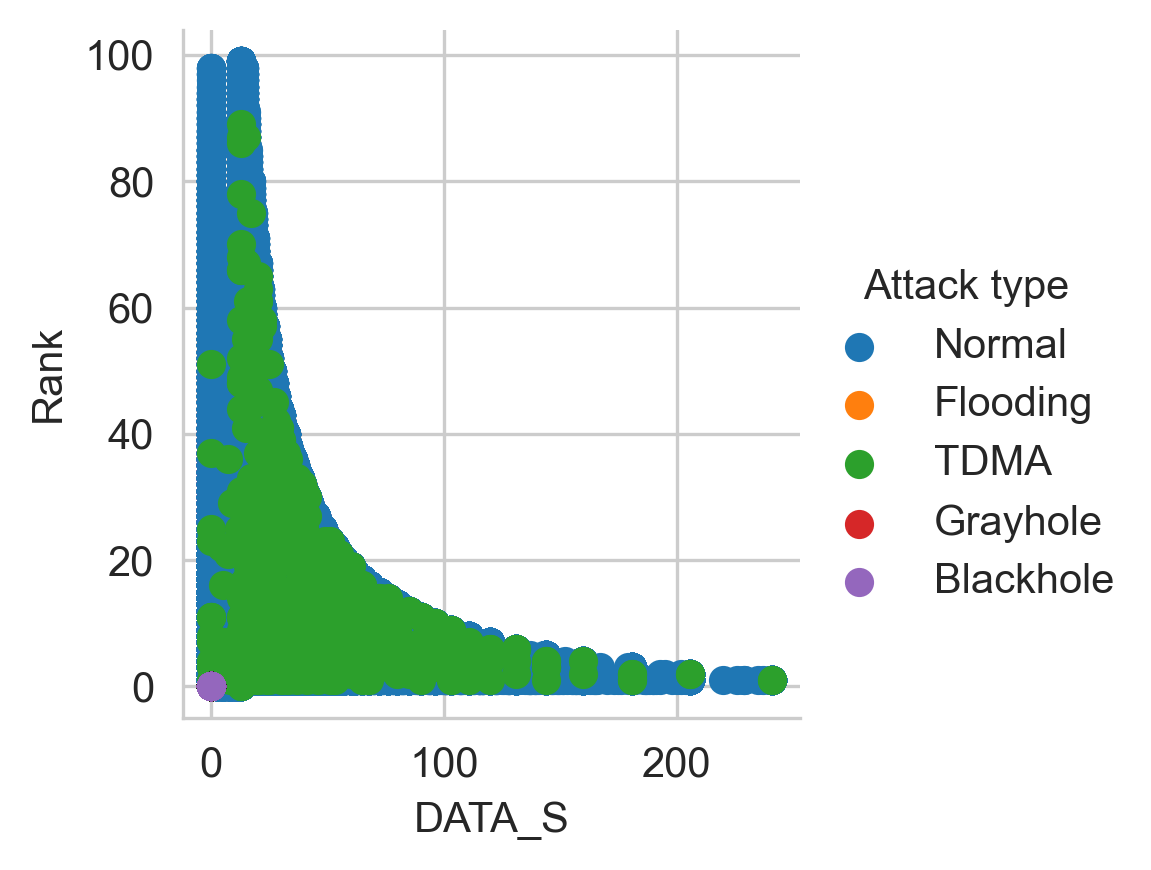

In [10]:
# Using Seaborn library to visualize 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(wsn_ds, hue = 'Attack type')\
    .map(plt.scatter, 'DATA_S', 'Rank') \
    .add_legend()

plt.show()

In [11]:
# Dropping the column named 'id' as it does not play any role in attack classification
wsn_ds = wsn_ds.drop('id', axis=1)

In [12]:
# Shape of the updated dataset
wsn_ds.shape

(374661, 18)

In [13]:
# Variables are categorized into input/independent variables and a target/output variable.

# Input variables (X)
X = wsn_ds[['Time', 'Is_CH', 'who CH', 'Dist_To_CH', 'ADV_S', 'ADV_R', 'JOIN_S', 'JOIN_R', 'SCH_S', 'SCH_R', 'Rank','send_code', 
           'DATA_S','DATA_R', 'Data_Sent_To_BS', 'dist_CH_To_BS', 'Expaned Energy']]

# Target variable (y)
y = wsn_ds['Attack type']

In [14]:
# Selecting 10 out of 17 features from the WSN-DS using Principal Component Analysis (PCA) and Mutual Information

from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=17)
X_pca = pca.fit_transform(X)

# Apply mutual information to select the top 10 features
k = 10
mi = SelectKBest(mutual_info_classif, k=k)
X_mi = mi.fit_transform(X_pca, y)

# Get the indices of the selected features
selected_features_idx = mi.get_support(indices=True)

# Print the names of the selected features
selected_features_names = X.columns[selected_features_idx]
print(selected_features_names)


Index(['Time', 'Is_CH', 'who CH', 'Dist_To_CH', 'ADV_S', 'SCH_S', 'SCH_R',
       'send_code', 'DATA_S', 'dist_CH_To_BS'],
      dtype='object')


In [15]:
# Subset of input variables (X_1) obtained as an output from the previous cell

X_1 = wsn_ds[['Time', 'Is_CH', 'who CH', 'Dist_To_CH', 'ADV_S', 'SCH_S', 'SCH_R',
       'send_code', 'DATA_S', 'dist_CH_To_BS']]


In [16]:
# Define the number of features to select for dimensionality reduction by Evolutionary Algorithms

# To reduce the overhead on WSNs, only 4 features would be considered
num_features = 4

In [17]:
# Split the dataset into training and test sets

# Ratio of dataset split: 70% for training and remaining 30% for testing purposes

X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=0)

In [18]:
# Table to show Dataset separated 70% training set and 30% testing sets

# Get the value counts of each attack type in the training set
train_counts = y_train.value_counts()

# Get the value counts of each attack type in the testing set
test_counts = y_test.value_counts()

# Create a new dataframe to hold the results
results = pd.DataFrame({
    'Attack Type': train_counts.index,
    'Training Set': train_counts.values,
    'Testing Set': test_counts.values
})

# Add a row to the dataframe to show the total number of samples in each set
results.loc['Total'] = ['All', len(X_train), len(X_test)]

# Print the results dataframe
print(results.to_string(index=False))



Attack Type  Training Set  Testing Set
     Normal        238119       101947
   Grayhole         10141         4455
  Blackhole          7025         3024
       TDMA          4664         1974
   Flooding          2313          999
        All        262262       112399


### Building the Anomaly Detection Model for Detection of DoS attacks in WSNs

#### MODULE 2: Dimensionality Reduction Using Evolutionary Algorithms

In [19]:
# 1. GRASSHOPPER OPTIMIZATION ALGORITHM (GOA)

# Define fitness function
def fitness(X_train, X_test, y_train, y_test, feature_mask):
    # Select features based on feature mask
    X_train_subset = X_train.iloc[:, feature_mask]
    X_test_subset = X_test.iloc[:, feature_mask]

    # Train and evaluate model using selected features
    model = DecisionTreeClassifier()
    model.fit(X_train_subset, y_train)
    score = model.score(X_test_subset, y_test)

    return score

# Define Grasshopper Optimization Algorithm
def grasshopper_optimization_algorithm(X_train, X_test, y_train, y_test, num_agents, max_iter, lb, ub):
    # Initialize agents' positions randomly
    positions = np.random.uniform(low=lb, high=ub, size=(num_agents, X_train.shape[1]))

    # Initialize best position and score
    best_position = None
    best_score = -1

    start_time = time()
    # Loop over iterations
    for iteration in range(max_iter):
        # Evaluate fitness of all agents
        scores = [fitness(X_train, X_test, y_train, y_test, feature_mask=np.round(position).astype(bool)) for position in positions]

        # Update best position and score
        best_index = np.argmax(scores)
        if scores[best_index] > best_score:
            best_position = positions[best_index]
            best_score = scores[best_index]

        # Update agents' positions using Grasshopper formula
        c = 1.0
        epsilon = 0.01
        alpha = 0.1
        r = np.random.uniform(low=0, high=1, size=num_agents)
        c_norm = c / np.sqrt(iteration+1)
        s = np.zeros((num_agents, X_train.shape[1]))
        for i in range(num_agents):
            for j in range(num_agents):
                if i != j:
                    s[i] += (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
            s[i] = s[i] / (num_agents-1)
            xichma = np.sqrt(np.sum(np.power(s[i], 2))) * r[i]
            delta_pos = c_norm * s[i] * np.exp(-1 * alpha * xichma) * (np.random.uniform(size=X_train.shape[1]) < (1 / (1 + np.exp(-1 * epsilon * np.abs(s[i])))))
            positions[i] += delta_pos

    # Select top 4 features
    feature_mask = np.round(best_position).astype(bool)
    top_features = X_train.columns[feature_mask].tolist()[:4]
    top_features_indices_GOA = np.where(feature_mask)[0][:4]
    
    end_time = time()
    print(f"Computation Time for GOA: {end_time - start_time:.2f}s")
    
    return top_features, top_features_indices_GOA


In [20]:
num_agents = 10
max_iter = 100
lb = 0
ub = 1

top_features, top_features_indices_GOA = grasshopper_optimization_algorithm(X_train, X_test, y_train, y_test, num_agents, max_iter, lb, ub)
print("Selected Features (names) by GOA:", top_features)
print("Selected Features (indices) by GOA:", top_features_indices_GOA)

Computation Time for GOA: 1469.25s
Selected Features (names) by GOA: ['who CH', 'Dist_To_CH', 'ADV_S', 'dist_CH_To_BS']
Selected Features (indices) by GOA: [2 3 4 9]


In [21]:
# 2. GENETIC ALGORITHM (GA)

import random
from sklearn.metrics import accuracy_score
from deap import base, creator, tools, algorithms

def fitness_function(individual, X_train, y_train, X_test, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[:, individual], y_train)
    y_pred = clf.predict(X_test[:, individual])
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,
start_time = time()
def genetic_algorithm_feature_selection(X_train, X_test, y_train, y_test):
    n_features = X_train.shape[1]
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    toolbox = base.Toolbox()
    toolbox.register("attribute", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", fitness_function, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)
    cxpb = 0.5
    mutpb = 0.2
    ngen = 50
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb, mutpb, ngen, stats=stats, halloffame=hof, verbose=True)
    best_individual = hof[0]
    end_time = time()
    print(f"Computation Time for GA: {end_time - start_time:.2f}s")
    return np.where(best_individual)[0][:4]

# example usage
selected_features_indices_GA = genetic_algorithm_feature_selection(X_train.values, X_test.values, y_train.values, y_test.values)
print("Selected Features indices:", selected_features_indices_GA)
print("Selected Features by GA:", X_train.columns[selected_features_indices_GA])


gen	nevals	avg     	min     	max     
0  	50    	0.933576	0.933576	0.933576
1  	32    	0.933576	0.933576	0.933576
2  	24    	0.933576	0.933576	0.933576
3  	31    	0.933576	0.933576	0.933576
4  	27    	0.933576	0.933576	0.933576
5  	30    	0.933576	0.933576	0.933576
6  	34    	0.933576	0.933576	0.933576
7  	34    	0.933576	0.933576	0.933576
8  	28    	0.933341	0.921814	0.933576
9  	33    	0.933576	0.933576	0.933576
10 	26    	0.933576	0.933576	0.933576
11 	24    	0.933576	0.933576	0.933576
12 	31    	0.933576	0.933576	0.933576
13 	30    	0.933576	0.933576	0.933576
14 	36    	0.933576	0.933576	0.933576
15 	31    	0.933576	0.933576	0.933576
16 	31    	0.933576	0.933576	0.933576
17 	23    	0.933576	0.933576	0.933576
18 	25    	0.933576	0.933576	0.933576
19 	31    	0.933576	0.933576	0.933576
20 	31    	0.933576	0.933576	0.933576
21 	29    	0.933576	0.933576	0.933576
22 	27    	0.933576	0.933576	0.933576
23 	28    	0.933576	0.933576	0.933576
24 	25    	0.933576	0.933576	0.933576
25 	31    	0

In [22]:
# 3. HYBRID GRASSHOPPER OPTIMIZATION ALGORITHM WITH GENETIC ALGORITHM (GOA-GA)

# Define fitness function
def fitness_function(X_train, X_test, y_train, y_test, feature_mask):
    # Check that at least one feature is selected
    if not any(feature_mask):
        return -1
    
    X_train_reduced = X_train.loc[:, feature_mask]

    X_test_reduced = X_test.loc[:, feature_mask]

    clf = DecisionTreeClassifier()
    clf.fit(X_train_reduced, y_train)
    accuracy = clf.score(X_test_reduced, y_test)
    return accuracy

# Define GOA-GA function
def goa_ga(X_train, X_test, y_train, y_test, max_iter, n_agents, pc, pm):
    # Initialize important parameters
    n_features = X_train.shape[1]
    feature_mask = np.ones(n_features, dtype=bool)
    agent_positions = np.zeros((n_agents, n_features), dtype=bool)
    agent_fitness = np.zeros(n_agents)
    best_agent_position = np.zeros(n_features, dtype=bool)
    best_agent_fitness = 0
    start_time = time()
    # Initialize the population randomly in the search space
    for i in range(n_agents):
        agent_positions[i] = np.random.choice([True, False], size=n_features)
        agent_fitness[i] = fitness_function(X_train, X_test, y_train, y_test, agent_positions[i])
        if agent_fitness[i] > best_agent_fitness:
            best_agent_position = agent_positions[i].copy()
            best_agent_fitness = agent_fitness[i]
    
    # Main loop
    for iteration in range(max_iter):
        # Update the position of the agents in the search space using GOA
        for i in range(n_agents):
            r_i = np.random.uniform(0, 1, size=n_features)
            for j in range(n_features):
                x_ij = agent_positions[i][j]
                x_best_j = best_agent_position[j]
                x_j = agent_positions[:, j]
                d_ij = np.abs(x_j ^ x_ij)
                if x_ij:
                    if np.sum(x_j) > 0:
                        a = np.sum(d_ij * x_j) / np.sum(x_j)
                        b = np.sum(d_ij * (1 - x_j)) / np.sum(1 - x_j)
                        c = r_i[j] * (a + b) / 2
                        e_j = c * np.exp(-iteration / max_iter)
                        agent_positions[i][j] = np.random.choice([True, False], p=[e_j, 1 - e_j])
                else:
                    if np.sum(x_j) > 0:
                        a = np.sum(d_ij * x_j) / np.sum(x_j)
                        b = np.sum(d_ij * (1 - x_j)) / np.sum(1 - x_j)
                        c = r_i[j] * (a + b) / 2
                        e_j = c * np.exp(-iteration / max_iter)
                        agent_positions[i][j] = np.random.choice([True, False], p=[1 - e_j, e_j])
        # Evaluate the updated solutions
        for i in range(n_agents):
            agent_fitness[i] = fitness_function(X_train, X_test, y_train, y_test, agent_positions[i])
            # Update best agent
            if agent_fitness[i] > best_agent_fitness:
                best_agent_position = agent_positions[i].copy()
                best_agent_fitness = agent_fitness[i]
        
        # Solution Evolution using GA
        # Selection
        fitness_scores = agent_fitness - np.min(agent_fitness)
        
        if np.sum(fitness_scores) == 0:
            fitness_scores = np.ones(n_agents)
        fitness_scores /= np.sum(fitness_scores)
        selected_agents = np.random.choice(np.arange(n_agents), size=n_agents, p=fitness_scores)
        # Crossover
        for i in range(0, n_agents, 2):
            if np.random.rand() < pc:
                # select parents
                parent1 = agent_positions[selected_agents[i]]
                parent2 = agent_positions[selected_agents[i+1]]
                # select crossover point
                crossover_point = np.random.randint(n_features)
                # perform crossover
                child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
                child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
                # update agent positions
                agent_positions[selected_agents[i]] = child1
                agent_positions[selected_agents[i+1]] = child2
        # Mutation
        for i in range(n_agents):
            if np.random.rand() < pm:
                # select mutation point
                mutation_point = np.random.randint(n_features)
                # perform mutation
                agent_positions[i][mutation_point] = not agent_positions[i][mutation_point]
        # Elitist strategy
        best_agent_index = np.argmax(agent_fitness)
        agent_positions[0] = best_agent_position
        agent_fitness[0] = best_agent_fitness
        
    end_time = time()
    print(f"Computation Time for GOA-GA: {end_time - start_time:.2f}s")
    
    # Return best solution
    return best_agent_position, best_agent_fitness



In [23]:
# Call the goa_ga() function
max_iter = 50
n_agents = 50
pc = 0.8
pm = 0.1
best_agent_position, best_agent_fitness = goa_ga(X_train, X_test, y_train, y_test, max_iter, n_agents, pc, pm)

# Get the indices of the top 4 features
top_4_indices_GOAGA = np.argsort(best_agent_position)[-4:]

# Get the names of the top 4 features
top_4_features_GOAGA = X_train.columns[top_4_indices_GOAGA]

# Display the top 4 features
print("Top 4 features indices by GOA-GA:", top_4_indices_GOAGA)
print("Top 4 features by GOA-GA:", top_4_features_GOAGA)


Computation Time for GOA-GA: 4488.96s
Top 4 features indices by GOA-GA: [2 4 5 9]
Top 4 features by GOA-GA: Index(['who CH', 'ADV_S', 'SCH_S', 'dist_CH_To_BS'], dtype='object')


In [24]:
# 4. DIFFERENTIAL EVOLUTION (DE)

def fitness_func(features, X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train[:, features], y_train)
    return clf.score(X_test[:, features], y_test)

def differential_evolution(X_train, X_test, y_train, y_test, max_iter, n_agents, F, CR):
    n_features = X_train.shape[1]
    agents_position = np.random.rand(n_agents, n_features) < 0.5
    agents_fitness = np.array([fitness_func(features, X_train, X_test, y_train, y_test) for features in agents_position])
    best_agent_index = np.argmax(agents_fitness)
    best_agent_position = agents_position[best_agent_index]
    best_agent_fitness = agents_fitness[best_agent_index]
    start_time = time()
    for i in range(max_iter):
        for j in range(n_agents):
            # Mutation
            r1, r2, r3 = np.random.choice(n_agents, 3, replace=False)
            mutant_agent_position = np.copy(agents_position[r1])
            mutant_agent_position += (F * (agents_position[r2].astype(int) ^ agents_position[r3].astype(int))).astype(bool)
            mutant_agent_position[mutant_agent_position < 0] = False
            mutant_agent_position[mutant_agent_position >= 1] = True
            # Crossover
            trial_agent_position = np.copy(agents_position[j])
            crossover_mask = np.random.rand(n_features) < CR
            crossover_mask[np.random.randint(n_features)] = True
            trial_agent_position[crossover_mask] = mutant_agent_position[crossover_mask]
            # Selection
            trial_agent_fitness = fitness_func(trial_agent_position, X_train, X_test, y_train, y_test)
            if trial_agent_fitness >= agents_fitness[j]:
                agents_position[j] = trial_agent_position
                agents_fitness[j] = trial_agent_fitness
                if trial_agent_fitness >= best_agent_fitness:
                    best_agent_position = trial_agent_position
                    best_agent_fitness = trial_agent_fitness
        print(f"Iteration {i+1}/{max_iter} - Best Fitness: {best_agent_fitness}")
    end_time = time()
    print(f"Computation Time: {end_time - start_time:.2f}s")
    return best_agent_position, best_agent_fitness


In [25]:
max_iter = 50
n_agents = 30
F = 0.5
CR = 0.7
best_agent_position, best_agent_fitness = differential_evolution(X_train.values, X_test.values, y_train, y_test, max_iter, n_agents, F, CR)
top_4_indices_DE = np.argsort(best_agent_position)[-4:]
print("Top 4 Feature Indices by DE:", top_4_indices_DE)

Iteration 1/50 - Best Fitness: 0.9896173453500476
Iteration 2/50 - Best Fitness: 0.9896173453500476
Iteration 3/50 - Best Fitness: 0.9896351391026611
Iteration 4/50 - Best Fitness: 0.9896885203605015
Iteration 5/50 - Best Fitness: 0.9896885203605015
Iteration 6/50 - Best Fitness: 0.9896885203605015
Iteration 7/50 - Best Fitness: 0.9896885203605015
Iteration 8/50 - Best Fitness: 0.9896885203605015
Iteration 9/50 - Best Fitness: 0.9896885203605015
Iteration 10/50 - Best Fitness: 0.9896885203605015
Iteration 11/50 - Best Fitness: 0.9896885203605015
Iteration 12/50 - Best Fitness: 0.9896885203605015
Iteration 13/50 - Best Fitness: 0.9896885203605015
Iteration 14/50 - Best Fitness: 0.9896885203605015
Iteration 15/50 - Best Fitness: 0.9896885203605015
Iteration 16/50 - Best Fitness: 0.9896885203605015
Iteration 17/50 - Best Fitness: 0.9896885203605015
Iteration 18/50 - Best Fitness: 0.9896885203605015
Iteration 19/50 - Best Fitness: 0.9896885203605015
Iteration 20/50 - Best Fitness: 0.989688

In [26]:
top_4_indices_DE = np.argsort(best_agent_position)[-4:]
top_4_features_DE = X_train.columns[top_4_indices_DE]
print("Top 4 Features by DE:", top_4_features_DE)

Top 4 Features by DE: Index(['SCH_R', 'send_code', 'DATA_S', 'dist_CH_To_BS'], dtype='object')


#### MODULE 3: Training of Machine Learning Classifiers

1. Classification using Multilayer Perceptron (MLP) algorithm

In [27]:
from sklearn.neural_network import MLPClassifier

In [28]:
# For features selected by GOA

# Select the top features using the GOA

X_train_subset = X_train.iloc[:, top_features_indices_GOA]
selected_features = X_train.columns[top_features_indices_GOA]

# Train the MLP classifier using the selected features
mlp_GOA = MLPClassifier()
mlp_GOA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_MLP_GOA = cross_val_score(mlp_GOA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_MLP_GOA)

Cross validation score with k=5: [0.90793663 0.90799382 0.90795394 0.90795394 0.90793487]


In [29]:
# For features selected by GA

# Select the top features using the GA

X_train_subset = X_train.iloc[:, selected_features_indices_GA]
selected_features = X_train.columns[selected_features_indices_GA]

# Train the MLP classifier using the selected features
mlp_GA = MLPClassifier()
mlp_GA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_MLP_GA = cross_val_score(mlp_GA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_MLP_GA)

Cross validation score with k=5: [0.94124264 0.94200522 0.93843895 0.93380615 0.94000229]


In [30]:
# For features selected by GOA-GA

# Select the top features using the GOA-GA

X_train_subset = X_train.iloc[:, top_4_indices_GOAGA]
selected_features = X_train.columns[top_4_indices_GOAGA]

# Train the MLP classifier using the selected features
mlp_GOAGA = MLPClassifier()
mlp_GOAGA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_MLP_GOAGA = cross_val_score(mlp_GOAGA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_MLP_GOAGA)

Cross validation score with k=5: [0.90812728 0.90810821 0.9080302  0.907973   0.90793487]


In [31]:
# For features selected by DE

# Select the top features using the DE

X_train_subset = X_train.iloc[:, top_4_indices_DE]
selected_features = X_train.columns[top_4_indices_DE]

# Train the MLP classifier using the selected features
mlp_DE = MLPClassifier()
mlp_DE.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_MLP_DE = cross_val_score(mlp_DE, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_MLP_DE)

Cross validation score with k=5: [0.93569481 0.93542791 0.93563639 0.93761916 0.93493098]


2. Classification using Naive Bayes (NB) algorithm

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
# For features selected by GOA

# Select the top features using the GOA

X_train_subset = X_train.iloc[:, top_features_indices_GOA]
selected_features = X_train.columns[top_features_indices_GOA]

# Train the Naive Bayes classifier using the selected features
nb_GOA = GaussianNB()
nb_GOA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_NB_GOA = cross_val_score(nb_GOA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_NB_GOA)

Cross validation score with k=5: [0.85733895 0.85453644 0.85554412 0.85628765 0.85920461]


In [34]:
# For features selected by GA

# Select the top features using the GA

X_train_subset = X_train.iloc[:, selected_features_indices_GA]
selected_features = X_train.columns[selected_features_indices_GA]

# Train the Naive Bayes classifier using the selected features
nb_GA = GaussianNB()
nb_GA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_NB_GA = cross_val_score(nb_GA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_NB_GA)

Cross validation score with k=5: [0.93071893 0.93123368 0.9311561  0.93172806 0.93027911]


In [35]:
# For features selected by GOA-GA

# Select the top features using the GOA-GA

X_train_subset = X_train.iloc[:, top_4_indices_GOAGA]
selected_features = X_train.columns[top_4_indices_GOAGA]

# Train the Naive Bayes classifier using the selected features
nb_GOAGA = GaussianNB()
nb_GOAGA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_NB_GOAGA = cross_val_score(nb_GOAGA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_NB_GOAGA)

Cross validation score with k=5: [0.87579357 0.87505004 0.87603905 0.87638222 0.87741173]


In [36]:
# For features selected by DE

# Select the top features using the DE

X_train_subset = X_train.iloc[:, top_4_indices_DE]
selected_features = X_train.columns[top_4_indices_DE]

# Train the Naive Bayes classifier using the selected features
nb_DE = GaussianNB()
nb_DE.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_NB_DE = cross_val_score(nb_DE, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_NB_DE)

Cross validation score with k=5: [0.82407107 0.82550092 0.82530695 0.82528788 0.82742317]


3. Classification using Logistic Regression (LR) algorithm

In [41]:
from sklearn.linear_model import LogisticRegression

In [48]:
# For features selected by GOA

# Select the top features using the GOA

X_train_subset = X_train.iloc[:, top_features_indices_GOA]
selected_features = X_train.columns[top_features_indices_GOA]

# Train the Logistic Regression classifier using the selected features
lr_GOA = LogisticRegression(max_iter=5000)
lr_GOA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_LR_GOA = cross_val_score(lr_GOA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_LR_GOA)

Cross validation score with k=5: [0.93443654 0.93460813 0.92185236 0.93430184 0.9343781 ]


In [47]:
# For features selected by GA

# Select the top features using the GA

X_train_subset = X_train.iloc[:, selected_features_indices_GA]
selected_features = X_train.columns[selected_features_indices_GA]

# Train the Logistic Regression classifier using the selected features
lr_GA = LogisticRegression(max_iter=5000)
lr_GA.fit(X_train[selected_features], y_train)
                        
# K-fold Cross Validation with k = 5
cross_score_LR_GA = cross_val_score(lr_GA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_LR_GA)

Cross validation score with k=5: [0.94011782 0.94048005 0.93939221 0.93956379 0.93973538]


In [49]:
# For features selected by GOA-GA

# Select the top features using the GOA-GA

X_train_subset = X_train.iloc[:, top_4_indices_GOAGA]
selected_features = X_train.columns[top_4_indices_GOAGA]

# Train the Logistic Regression classifier using the selected features
lr_GOAGA = LogisticRegression(max_iter=5000)
lr_GOAGA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_LR_GOAGA = cross_val_score(lr_GOAGA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_LR_GOAGA)

Cross validation score with k=5: [0.89098812 0.90793663 0.89874552 0.89866926 0.8989743 ]


In [50]:
# For features selected by DE

# Select the top features using the DE

X_train_subset = X_train.iloc[:, top_4_indices_DE]
selected_features = X_train.columns[top_4_indices_DE]

# Train the Logistic Regression classifier using the selected features
lr_DE = LogisticRegression(max_iter=5000)
lr_DE.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_LR_DE = cross_val_score(lr_DE, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_LR_DE)

Cross validation score with k=5: [0.93582827 0.93792538 0.93561733 0.93740944 0.93582704]


4. Classification using Decision Tree based on CART algorithm

In [37]:
# For features selected by GOA

# Select the top features using the GOA

X_train_subset = X_train.iloc[:, top_features_indices_GOA]
selected_features = X_train.columns[top_features_indices_GOA]

# Train the Decision Tree (CART) classifier using the selected features
dt_GOA = DecisionTreeClassifier()
dt_GOA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_DT_GOA = cross_val_score(dt_GOA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_DT_GOA)

Cross validation score with k=5: [0.95258612 0.95271958 0.95075498 0.95159384 0.95153664]


In [38]:
# For features selected by GA

# Select the top features using the GA

X_train_subset = X_train.iloc[:, selected_features_indices_GA]
selected_features = X_train.columns[selected_features_indices_GA]

# Train the Decision Tree (CART) classifier using the selected features
dt_GA = DecisionTreeClassifier()
dt_GA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_DT_GA = cross_val_score(dt_GA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_DT_GA)

Cross validation score with k=5: [0.93966027 0.94088041 0.94004042 0.94063143 0.94005948]


In [39]:
# For features selected by GOA-GA

# Select the top features using the GOA-GA

X_train_subset = X_train.iloc[:, top_4_indices_GOAGA]
selected_features = X_train.columns[top_4_indices_GOAGA]

# Train the Decision Tree (CART) classifier using the selected features
dt_GOAGA = DecisionTreeClassifier()
dt_GOAGA.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_DT_GOAGA = cross_val_score(dt_GOAGA, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_DT_GOAGA)

Cross validation score with k=5: [0.97104074 0.97100261 0.96976283 0.97071608 0.97067795]


In [40]:
# For features selected by DE

# Select the top features using the DE

X_train_subset = X_train.iloc[:, top_4_indices_DE]
selected_features = X_train.columns[top_4_indices_DE]

# Train the Decision Tree (CART) classifier using the selected features
dt_DE = DecisionTreeClassifier()
dt_DE.fit(X_train[selected_features], y_train)

# K-fold Cross Validation with k = 5
cross_score_DT_DE = cross_val_score(dt_DE, X_train_subset, y_train, cv=5)
print('Cross validation score with k=5:', cross_score_DT_DE)

Cross validation score with k=5: [0.95026023 0.95033649 0.95086937 0.95081217 0.95069778]


#### MODULE 4: Recognition of Attack on Test Data and Unseen Data and Performance Metrics Evaluation

#### Checking model on TEST DATA i.e 30% of the original WSN_DS Dataset 

#### Checking model on UNSEEN DATA 

#### MODULE 5: Analysis of DoS Attack Types

In [ ]:
# Train the classifier on the best subset of features
X_train_subset = X_train.iloc[:, best_subset]
clf = DecisionTreeClassifier()
clf.fit(X_train_subset, y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_subset, y_train, cv=5)

In [ ]:
# Print the evaluation scores
print('Cross validation scores:', scores)

In [ ]:
# Evaluate the performance of the classifier on the test set
X_test_subset = X_test.iloc[:, best_subset]
y_pred = clf.predict(X_test_subset)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)